In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

ticker = "TSLA"
data = yf.download(ticker)

plt.title("Close price of google")
plt.plot(data["Volume"])






In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
data=pd.read_csv("test.csv")
data.head()

,Date,Close,High,Low,Open,Volume
0,Date,NaN,NaN,NaN,NaN,NaN
1,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500.0
2,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500.0
3,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000.0
4,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000.0


In [6]:
data.info()
data.isnull().sum()
data = data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3660 non-null   object 
 1   Close   3659 non-null   float64
 2   High    3659 non-null   float64
 3   Low     3659 non-null   float64
 4   Open    3659 non-null   float64
 5   Volume  3659 non-null   float64
dtypes: float64(5), object(1)
memory usage: 171.7+ KB


In [7]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 3659
Train data length : 2561
Validation data lenth : 1098


In [8]:
train_data = data[["Date", "Close"]][:length_train]
train_data.head()


,Date,Close
1,2010-06-29,1.592667
2,2010-06-30,1.588667
3,2010-07-01,1.464000
4,2010-07-02,1.280000
5,2010-07-06,1.074000


In [9]:
validation_data = data[["Date", "Close"]][length_validation:]
validation_data.head()

,Date,Close
1099,2014-11-06,16.081333
1100,2014-11-07,16.013332
1101,2014-11-10,16.128668
1102,2014-11-11,16.738667
1103,2014-11-12,16.606667


In [10]:
dataset_train = train_data.Close.values
dataset_train.shape

(2561,)

In [11]:
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(2561, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(2561, 1)

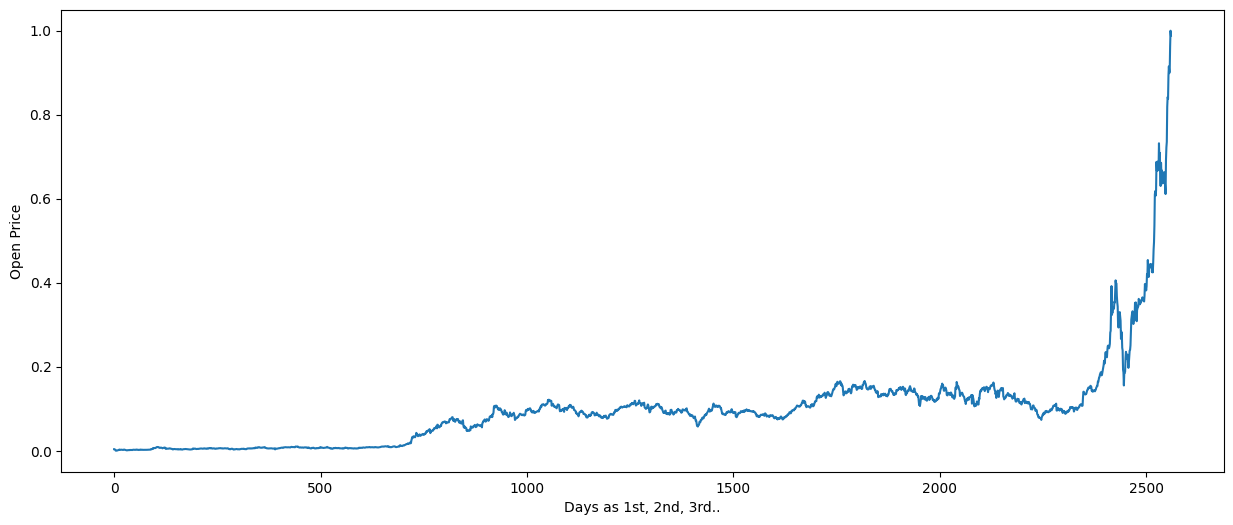

In [14]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [15]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (2511, 50)
Shape of y_train before reshape : (2511,)


In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (2511, 50, 1)
Shape of y_train after reshape : (2511, 1)


In [18]:
X_train[0]

array([[0.00363931],
       [0.00361232],
       [0.00277109],
       [0.0015295 ],
       [0.00013946],
       [0.        ],
       [0.00074676],
       [0.00071977],
       [0.00056232],
       [0.00105265],
       [0.00181741],
       [0.0018399 ],
       [0.00217729],
       [0.0027486 ],
       [0.00202434],
       [0.00198835],
       [0.00233924],
       [0.00246969],
       [0.00231675],
       [0.0021368 ],
       [0.00221327],
       [0.00204683],
       [0.00186239],
       [0.00230325],
       [0.00276659],
       [0.0024562 ],
       [0.00209181],
       [0.00170494],
       [0.00170944],
       [0.00145303],
       [0.00094469],
       [0.00080973],
       [0.00113363],
       [0.00134056],
       [0.00150701],
       [0.00133606],
       [0.00134506],
       [0.00148451],
       [0.00194786],
       [0.0015295 ],
       [0.0018444 ],
       [0.00177692],
       [0.00175443],
       [0.0018309 ],
       [0.00165546],
       [0.00209181],
       [0.00236623],
       [0.002

In [19]:
y_train[0]
import warnings
warnings.filterwarnings('ignore')


In [24]:
from keras.layers import LSTM,Dense
from keras.models import Sequential
y_train = scaler.fit_transform(y_train)

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
252/252 [==============================] - 5s 12ms/step - loss: 5.7265e-04 - accuracy: 7.9650e-04
Epoch 2/10
252/252 [==============================] - 3s 12ms/step - loss: 3.0826e-04 - accuracy: 7.9650e-04
Epoch 3/10
252/252 [==============================] - 3s 12ms/step - loss: 2.2557e-04 - accuracy: 7.9650e-04
Epoch 4/10
252/252 [==============================] - 3s 12ms/step - loss: 1.9900e-04 - accuracy: 7.9650e-04
Epoch 5/10
252/252 [==============================] - 3s 12ms/step - loss: 1.3207e-04 - accuracy: 7.9650e-04
Epoch 6/10
252/252 [==============================] - 3s 13ms/step - loss: 1.4400e-04 - accuracy: 7.9650e-04
Epoch 7/10
252/252 [==============================] - 3s 12ms/step - loss: 1.2566e-04 - accuracy: 7.9650e-04
Epoch 8/10
252/252 [==============================] - 3s 12ms/step - loss: 1.8323e-04 - accuracy: 7.9650e-04
Epoch 9/10
252/252 [==============================] - 3s 12ms/step - loss: 1.0731e-04 - accuracy: 7.9650e-04
Epoch 10/10
252/252

In [25]:
history2.history["loss"]

[0.0005726453964598477,
 0.00030826483271084726,
 0.00022556590556632727,
 0.00019900109327863902,
 0.00013207155279815197,
 0.0001439982879674062,
 0.00012565779616124928,
 0.00018322769028600305,
 0.0001073125604307279,
 0.0001100994850276038]

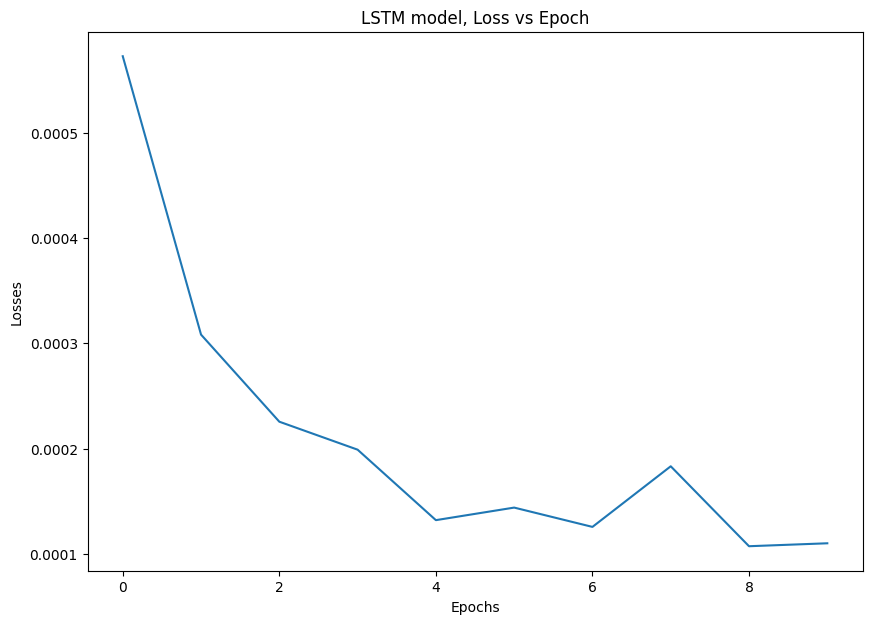

In [26]:
plt.figure(figsize =(10,7))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Loss vs Epoch")
plt.show()

NameError: name 'X_test' is not defined

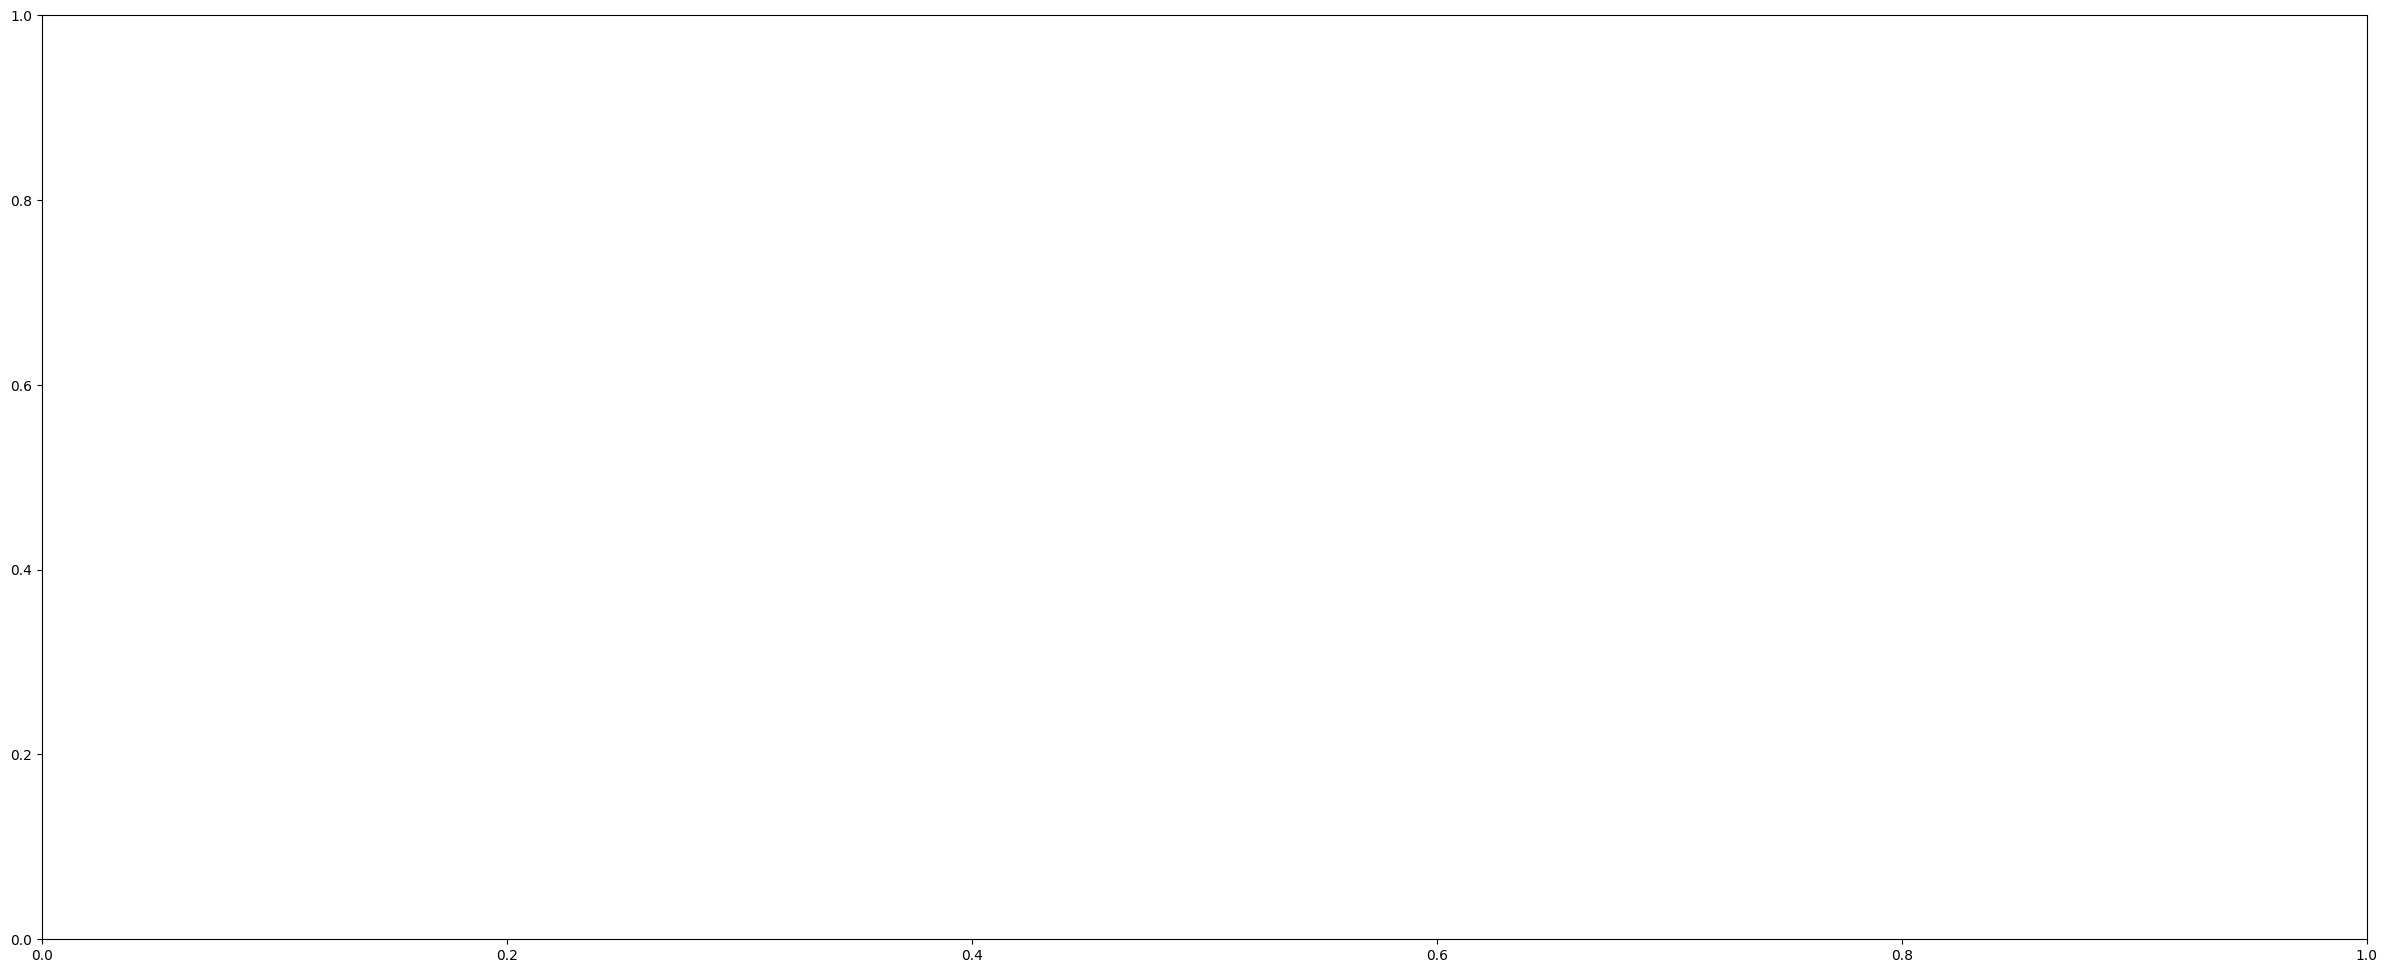

In [27]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [152]:
data.iloc[-1]

Date      2025-01-13
Close     403.309998
High      403.790009
Low       380.070007
Open      383.209991
Volume    66525600.0
Name: 3659, dtype: object

In [29]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.05826926],
        [0.05805305],
        [0.03233334],
        [0.        ],
        [0.01201694],
        [0.17338124],
        [0.1916228 ],
        [0.23592988],
        [0.43978556],
        [0.42439697],
        [0.39461403],
        [0.35934126],
        [0.28533765],
        [0.41570855],
        [0.39422501],
        [0.43416618],
        [0.42902223],
        [0.41726463],
        [0.49961104],
        [0.41687561],
        [0.42033367],
        [0.39560815],
        [0.4660673 ],
        [0.46356009],
        [0.46874732],
        [0.49844385],
        [0.57430629],
        [0.66158032],
        [0.64026972],
        [0.71384117],
        [0.77928591],
        [0.75836433],
        [0.84952884],
        [1.        ],
        [0.95936719],
        [0.89617019],
        [0.78218213],
        [0.8059134 ],
        [0.82709432],
        [0.95357487],
        [0.88596868],
        [0.75577072],
        [0.77474719],
        [0.62911736],
        [0.59185621],
        [0

In [30]:
from raiwidgets import ResponsibleAIDashboard
from responsibleai import RAIInsights

In [37]:
from responsibleai.feature_metadata import FeatureMetadata
feature_metadata = FeatureMetadata(categorical_features=[], dropped_features=[])
target_feature='y'

UserConfigValidationException: Target name y not present in train/test data